epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


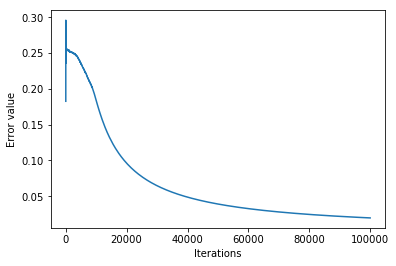

[0 0] [ 0.01421188]
[0 1] [ 0.98575786]
[1 0] [ 0.98580025]
[1 1] [ 0.01646181]


In [26]:
# Task: Model XOR with Sigmoid functions
# achieved by assigning 'sigmoid' to 'self.activation'
# and 'sigmoid_prime' to 'self.activation_prime'

# also, the sigmoid function needed some corrections
# the '-k' part felt redundant, so it was removed

# the sigmoid function has a range of [0..1]
# so the derivative of sigmoid was producing results around 0.5
# instead of 0 or 1
# in order to correct that mistake the sigmoid prime 
# was rewritten from 'sigmoid(x)*(1.0-sigmoid(x))'
# to 'x * (1.0 - x)', because at these ranges it is fair
# to approximate sigmoid(x) ~ x
# apart from that, the results are now closer to the tanh(x) function

import numpy as np
import matplotlib.pyplot as plt

# kk = 1
# alpha = 0.9
momentum_factor = 0.1

def sigmoid(x):
    # return 1.0/(1.0 + np.exp(-k*x))
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    # return sigmoid(x)*(1.0-sigmoid(x))
    return x * (1.0 - x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

class NeuralNetwork:

    def __init__(self, layers):
        # self.activation = tanh
        # self.activation_prime = tanh_prime
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        self.weights = []

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) - 1
            self.weights.append(r)
        r = 2*np.random.random((layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate = 0.2, epochs = 100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis = 1)

# Task: plot the error
# in order to do that it is necessary to initialize two containers
# that will consist of calculated error 'errors_'
# and correspondent step 'epochs_'

        errors_ = []
        epochs_ = []

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]

            # pushing squared error in order to avoid negative numbers
            errors_.append(np.sum(error**2))

            deltas = [error * self.activation_prime(a[-1])]

            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.

            prev_weight = 0
            for i in range(len(self.weights)):
                if i == 0:
                    prev_weight = 0
                else:
                    prev_weight = self.weights[i]

                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                # Vanilla update
                # x += - learning_rate * dx
                # # Momentum update
                # v = mu * v - learning_rate * dx # integrate velocity
                # x += v # integrate position
                # deltai += - learning_rate*layer.T.dot(delta)
                # self.weights[i] += deltai
                # v[i] = 0.9*v[i] - learning_rate*layer.T.dot(delta)

                # v = self.weights[i+1] - self.weights[i]

                # self.weights[i] = self.weights[i] + learning_rate*layer.T.dot(delta)

                # delta = -1 * lr * grad(w)
                #w = w + delta
                
                # delta = -1 * lr * grad(w)
                #w = w + delta + (mf * prev(delta))
                
                # Task: add moment's rule to the learning equation
                # moment's rule basically asks to keep in mind the previous iterations of the
                # weight update, here we achieve it by multiplying the 'momentum_factor' and prev. weight
                # which can be interpreted via delta
                
                delta_now = learning_rate*layer.T.dot(delta)
                self.weights[i] += (delta_now + momentum_factor*delta)

            # pushing the average of the 'errors_' container
            epochs_.append(np.average(errors_))

            if k % 10000 == 0:
                print('epochs:', k)
                
        plt.plot(epochs_)
        plt.xlabel('Iterations')
        plt.ylabel('Error value')
        plt.show()

    def predict(self, x):
        a = np.concatenate((np.ones(1).T, np.array(x)))

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':
    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))